## Import all necessaries libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Import Dataset

In [2]:
df = pd.read_csv("netflix_titles.csv")

## Apply data preprocessing

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year

df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s+(\w+)', expand=True)
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

text_cols = ['type', 'title', 'director', 'cast', 'country', 'rating', 'duration_type']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

df = df.dropna(subset=['title', 'type', 'release_year', 'date_added', 'duration_int', 'duration_type'])

In [4]:
df['country'] = df['country'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unrated")
df['director'] = df['director'].replace("nan", "Unknown")
df['cast'] = df['cast'].replace("nan", "Unknown")

df['release_year'] = df['release_year'].astype(int)
df['duration_int'] = df['duration_int'].astype(int)
df['duration_type'] = df['duration_type'].astype('category')
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')


In [5]:
print("✅ Cleaned Dataset Info:\n")
print(df.info())
print("\n🔍 Sample of Cleaned Data:\n")
print(df.head())

✅ Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8706 non-null   object        
 1   type           8706 non-null   category      
 2   title          8706 non-null   object        
 3   director       8706 non-null   object        
 4   cast           8706 non-null   object        
 5   country        8706 non-null   object        
 6   date_added     8706 non-null   datetime64[ns]
 7   release_year   8706 non-null   int32         
 8   rating         8706 non-null   category      
 9   duration       8706 non-null   object        
 10  listed_in      8706 non-null   object        
 11  description    8706 non-null   object        
 12  year_added     8706 non-null   float64       
 13  duration_int   8706 non-null   int32         
 14  duration_type  8706 non-null   category      
dtypes

## Visualize the trends and the insight of our data by some visuals techniques

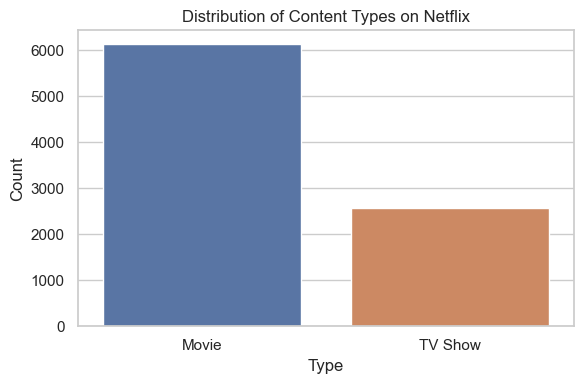

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type',hue='type')
plt.title("Distribution of Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show();


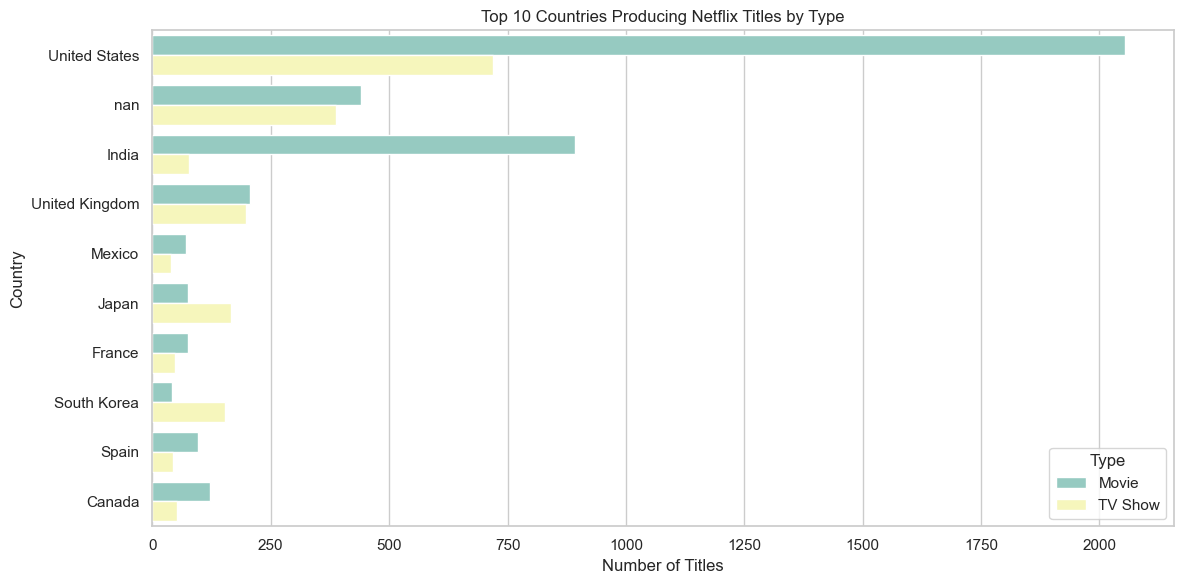

In [7]:
top_countries = df['country'].value_counts().nlargest(10).index

country_df = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=country_df, y='country', hue='type', palette='Set3')
plt.title("Top 10 Countries Producing Netflix Titles by Type")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.legend(title='Type')
plt.tight_layout()
plt.show()


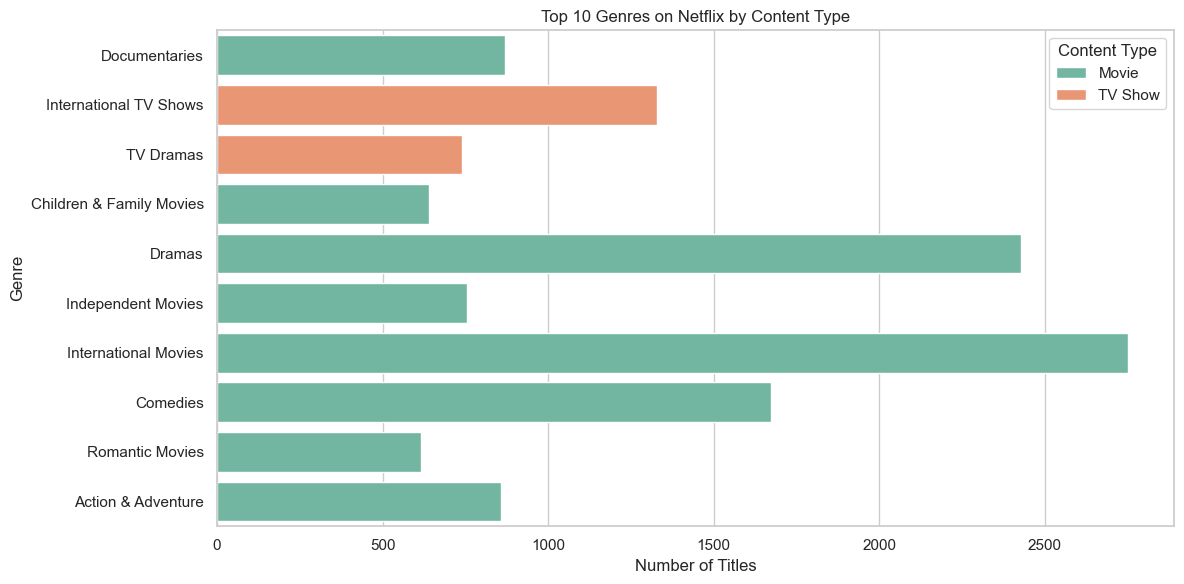

In [8]:
genre_df = df[['title', 'type', 'listed_in']].copy()

genre_df['listed_in'] = genre_df['listed_in'].str.split(', ')
genre_df = genre_df.explode('listed_in')

top_genres = genre_df['listed_in'].value_counts().nlargest(10).index

genre_df_top = genre_df[genre_df['listed_in'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df_top, y='listed_in', hue='type', palette='Set2')
plt.title("Top 10 Genres on Netflix by Content Type")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


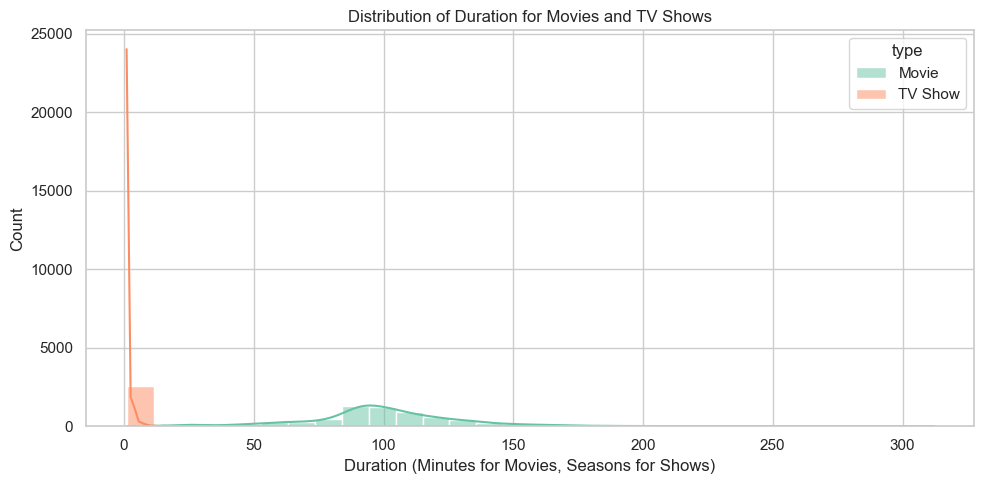

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='duration_int', hue='type', bins=30, kde=True, palette='Set2')
plt.title("Distribution of Duration for Movies and TV Shows")
plt.xlabel("Duration (Minutes for Movies, Seasons for Shows)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

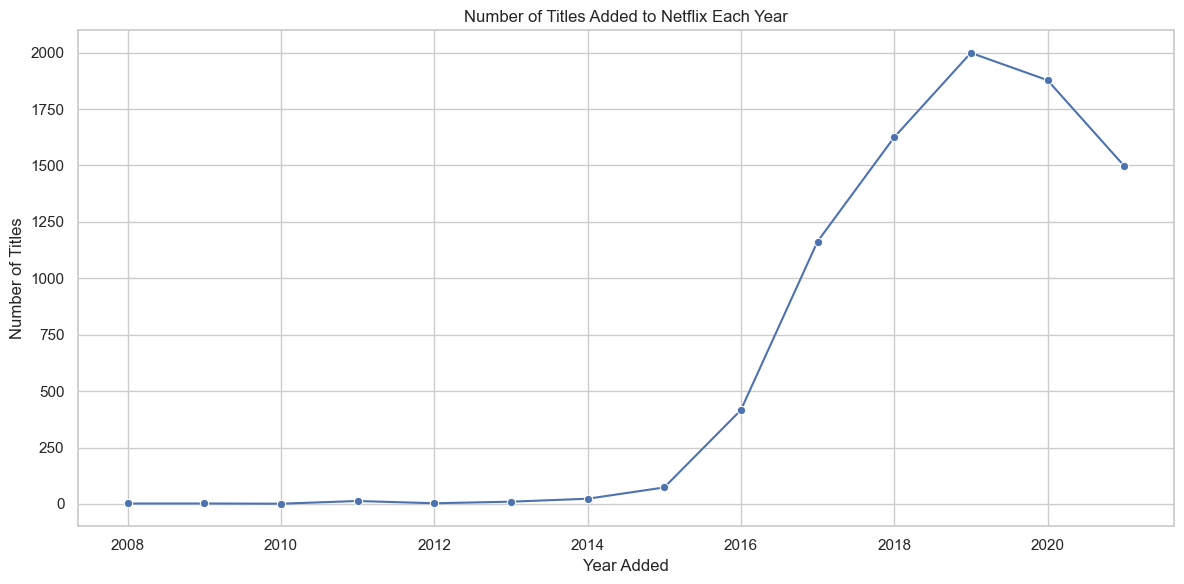

In [10]:
plt.figure(figsize=(12, 6))
yearly_counts = df['year_added'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()